In [ ]:
import scipy.io as sio
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,InputLayer,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
Vdc = sio.loadmat("/content/drive/MyDrive/FYP code/error.mat")

In [ ]:
Vdc["error_new"]

array([[-100.        ],
       [ -99.99995496],
       [ -99.99987533],
       ...,
       [   2.38196788],
       [   2.38109307],
       [   2.37924516]])

In [ ]:
PI_out = sio.loadmat("/content/drive/MyDrive/FYP code/PIout_with_error.mat")

In [ ]:
PI_out["PIout_new"]

array([[-1000.        ],
       [-1000.00054957],
       [-1000.00075333],
       ...,
       [  152.85049884],
       [  152.84177447],
       [  152.82331922]])

In [ ]:
df = pd.DataFrame({"Vdc":Vdc["error_new"].flatten(),"PIout":PI_out["PIout_new"].flatten()},index = None)

In [ ]:
min_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [ ]:
#df = pd.DataFrame(std_scaler.fit_transform(df),columns = df.columns,index = None)
df = pd.DataFrame(min_scaler.fit_transform(df),columns = df.columns,index = None)

In [ ]:
df

,Vdc,PIout
0,0.000000e+00,6.444320e-07
1,3.813592e-07,1.743068e-07
2,1.055499e-06,0.000000e+00
3,2.291006e-06,3.928826e-07
4,4.019214e-06,1.283579e-06
...,...,...
2403731,8.668403e-01,9.862102e-01
2403732,8.668327e-01,9.862026e-01
2403733,8.668252e-01,9.861951e-01
2403734,8.668178e-01,9.861876e-01


In [ ]:
df.describe()

,Vdc,PIout
count,2.403736e+06,2.403736e+06
mean,8.921061e-01,9.637251e-01
std,6.941226e-02,7.537121e-02
min,0.000000e+00,0.000000e+00
25%,8.764131e-01,9.676807e-01
50%,8.953096e-01,9.782533e-01
75%,9.188020e-01,9.821801e-01
max,1.000000e+00,1.000000e+00


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df[["Vdc"]].values.reshape(-1,1),df[["PIout"]].values.reshape(-1,1),test_size = 0.2)

In [ ]:
x_train

array([[0.92127966],
       [0.87633472],
       [0.90629706],
       ...,
       [0.86283368],
       [0.8470181 ],
       [0.92244015]])

In [ ]:
y_train

array([[0.97023945],
       [0.9867149 ],
       [0.97989348],
       ...,
       [0.98145951],
       [0.83949717],
       [0.96302662]])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "mse",
    #metrics = [MeanSquaredError()]
)

In [ ]:
history = model.fit(x_train,y_train,batch_size = 32,epochs = 10,validation_data = (x_test,y_test))

Epoch 1/10
60094/60094 [==============================] - 163s 3ms/step - loss: 3.2651e-04 - val_loss: 1.2384e-04
Epoch 2/10
60094/60094 [==============================] - 163s 3ms/step - loss: 1.3719e-04 - val_loss: 3.4645e-04
Epoch 3/10
60094/60094 [==============================] - 165s 3ms/step - loss: 1.2951e-04 - val_loss: 1.5380e-04
Epoch 4/10
60094/60094 [==============================] - 168s 3ms/step - loss: 1.2411e-04 - val_loss: 1.1568e-04
Epoch 5/10
60094/60094 [==============================] - 166s 3ms/step - loss: 1.2083e-04 - val_loss: 1.1590e-04
Epoch 6/10
60094/60094 [==============================] - 167s 3ms/step - loss: 1.2145e-04 - val_loss: 1.0672e-04
Epoch 7/10
60094/60094 [==============================] - 166s 3ms/step - loss: 1.1819e-04 - val_loss: 1.0960e-04
Epoch 8/10
60094/60094 [==============================] - 173s 3ms/step - loss: 1.1768e-04 - val_loss: 1.2186e-04
Epoch 9/10
60094/60094 [==============================] - 166s 3ms/step - loss: 1.1609e-

In [ ]:
y_predict = model.predict(x_test)

15024/15024 [==============================] - 24s 2ms/step


In [ ]:
R2 = r2_score(y_test,y_predict)
R2

0.9810924998252568

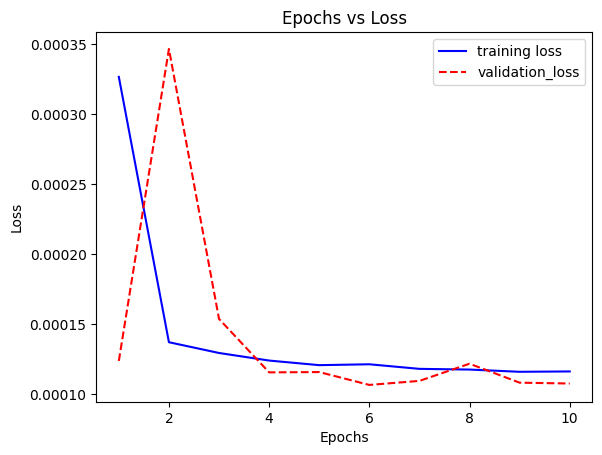

In [ ]:
train_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
epochs = range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,"b-",label = "training loss")
plt.plot(epochs,validation_loss,"r--",label = "validation_loss")
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

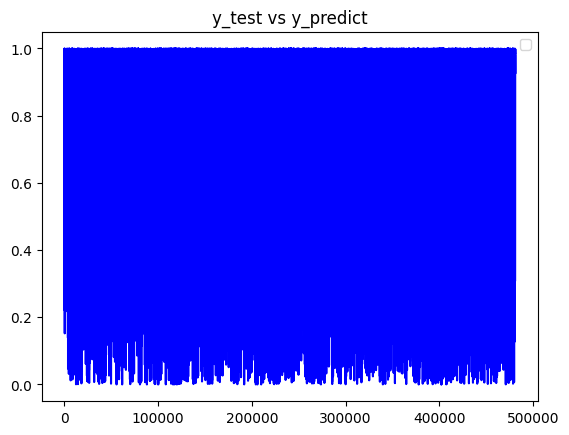

In [ ]:
#plt.scatter(y_test,y_predict)
plt.plot(range(len(y_test)),y_test,"b-")
plt.plot(range(len(y_predict)),y_predict,"r--")
plt.title("y_test vs y_predict")
plt.legend()
plt.show()

In [ ]:
model.save("/content/model_9810.h5")

In [ ]:
x_train,y_train

(array([[0.9325958 ],
        [0.89270915],
        [0.87370151],
        ...,
        [0.94906623],
        [0.93210527],
        [0.24904989]]),
 array([[0.96190442],
        [0.98009777],
        [0.97955615],
        ...,
        [0.94379109],
        [0.95532681],
        [0.24500799]]))

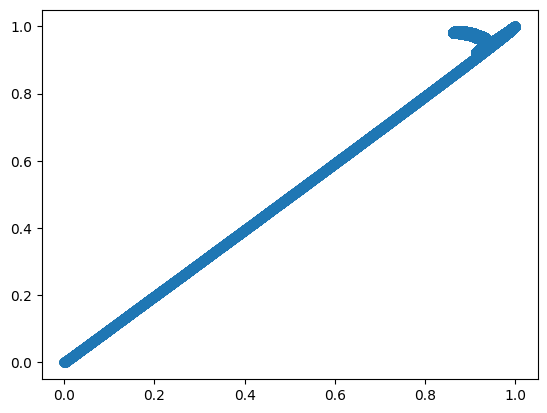

In [ ]:
plt.scatter(x_train,y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
gbc = GradientBoostingClassifier()
gbr = GradientBoostingRegressor()
gnb = GaussianNB()
log_reg = LogisticRegression()
li_reg = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()

In [ ]:
gbr.fit(x_train,y_train)
li_reg.fit(x_train,y_train)
svr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
rfr.fit(x_train,y_train)

<ipython-input-44-3f392adc2e88>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
gbr_sc = gbr.score(x_test,y_test)
li_regsc = li_reg.score(x_test,y_test)
svr_sc = svr.score(x_test,y_test)
rfr_sc = rfr.score(x_test,y_test)

In [ ]:
scores = {
    "gbr":gbr_sc,
    "li_reg":li_regsc,
    "svr":svr_sc,
    "rfr":rfr_sc
}

In [ ]:
scores

{'gbr': 0.9822306218776569,
 'li_reg': 0.754374053204646,
 'svr': -0.37535965917080216,
 'rfr': 0.9812122390500488}

In [ ]:
import joblib
joblib.dump(gbr, 'gbr_model.joblib')

['gbr_model.joblib']

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(gbr, file)

In [ ]:
import pickle
model_file = "PI_model.pkl"
with open(model_file,"wb") as f:
  pickle.dump(model,f)

In [ ]:
file = "min_max_scaler.pkl"
with open(file,"wb") as f:
  pickle.dump(min_scaler,f)

In [ ]:
with open("/content/gbr.pkl","rb") as f:
  model = pickle.load(f)